In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
tables = Base.classes.keys()
tables

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found
measure_df = pd.read_sql("select * from measurement", conn)
measure_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [8]:
station_df = pd.read_sql("select * from station", conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [9]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# today = dt.date.today()

# last_year = today - delta
# print(last_year)



# Calculate the date 1 year ago from the last data point in the database

last = session.query(Measurements.date).order_by(Measurements.date.desc()).first()[0]
last_dt = dt.datetime.strptime(last, ("%Y-%m-%d"))
today = dt.date.today()
delta = dt.timedelta(days = 365)
one_year = (last_dt - delta)
# one_year
# last, last_dt, today, delta

# Perform a query to retrieve the data and precipitation scores

stations = session.query(Measurements.station).all()
prcp = session.query(Measurements.prcp).all()
dates = session.query(Measurements.date).all()
dates

station_list = [station[0] for station in stations]
prcp_list = [pre[0] for pre in prcp]
date_list = [date[0] for date in dates]

data = {"Station": station_list, "Precipitation": prcp_list, "Dates": date_list}

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(data)
df.head(10)
dates_df = df.set_index("Dates")

# Sort the dataframe by date

dates_df

,Station,Precipitation
Dates,,
2010-01-01,USC00519397,0.08
2010-01-02,USC00519397,0.00
2010-01-03,USC00519397,0.00
2010-01-04,USC00519397,0.00
2010-01-06,USC00519397,NaN
...,...,...
2017-08-19,USC00516128,0.09
2017-08-20,USC00516128,NaN
2017-08-21,USC00516128,0.56


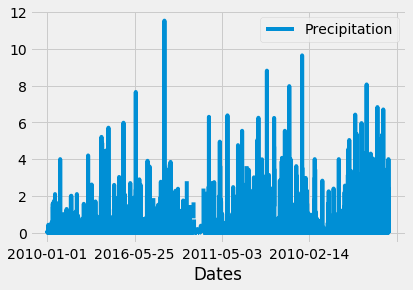

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data

dates_df.plot(x_compat=True)



In [12]:
station_list

['USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC00519397',
 'USC005

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df = df["Precipitation"].describe()
prcp_df

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: Precipitation, dtype: float64

In [14]:
# Design a query to show how many stations are available in this dataset?

unique_stations = session.query(Measurements.station).group_by(Measurements.station).count()
print(f"There are {unique_stations} unique stations available in this dataset.")

There are 9 unique stations available in this dataset.


In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_groups = df["Station"].value_counts()
active_stations = pd.DataFrame(station_groups)
top3 = active_stations["Station"].head(3)

# active_stations = session.query(Measurements.station).func.count((Measurements.station))
# active_stations

print(f"The most active stations are: {top3}.")

The most active stations are: USC00519281    2772
USC00519397    2724
USC00513117    2709
Name: Station, dtype: int64.


In [101]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# func.avg

# print(f"The lowest temperature recorded at {active_station} was: {lowest_temp}. The highest temperature was: {highest_temp}. The average temperature was: {avg_temp}.")
      

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
